In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
# download the data from https://boonelab.ccbr.utoronto.ca/supplement/costanzo2009/ and unzip it
# here is the linux command to do it
# wget https://boonelab.ccbr.utoronto.ca/supplement/costanzo2009/sgadata_costanzo2009_rawdata_101120.txt.gz
# gunzip sgadata_costanzo2009_rawdata_101120.txt.gz

In [4]:
file_path = '/uoa/home/r04km21/sharedscratch/figure-practice/sga_analysis/sgadata_costanzo2009_rawdata_101120.txt'

In [5]:
df = pd.read_csv(file_path, sep="\t", header=None)
df.columns = ["Query ORF", "Query gene", "Array ORF", "Array gene", "Genetic interaction score (ε)", \
    "Standard deviation", "p-value", "Query single mutant fitness (SMF)", \
    "Query SMF standard deviation", "Array SMF", "Array SMF standard deviation", \
    "Double mutant fitness", "Double mutant fitness standard deviation"]
df

,Query ORF,Query gene,Array ORF,Array gene,Genetic interaction score (ε),Standard deviation,p-value,Query single mutant fitness (SMF),Query SMF standard deviation,Array SMF,Array SMF standard deviation,Double mutant fitness,Double mutant fitness standard deviation
0,YAL063C,FLO9,YAL068C,PAU8,NaN,NaN,NaN,1.1026,0.0119,1.0353,0.0081,NaN,NaN
1,YAL063C,FLO9,YAL067C,SEO1,NaN,NaN,NaN,1.1026,0.0119,1.0204,0.0064,NaN,NaN
2,YAL063C,FLO9,YAL066W,YAL066W,NaN,NaN,NaN,1.1026,0.0119,1.0610,0.0108,NaN,NaN
3,YAL063C,FLO9,YAL065C,YAL065C,NaN,NaN,NaN,1.1026,0.0119,1.0532,0.0085,NaN,NaN
4,YAL063C,FLO9,YAL064C-A,YAL064C-A,NaN,NaN,NaN,1.1026,0.0119,1.0210,0.0077,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647230,YPR198W,SGE1,YPR197C,YPR197C,NaN,NaN,NaN,1.0501,0.0111,1.0392,0.0132,NaN,NaN
6647231,YPR198W,SGE1,YPR198W,SGE1,NaN,NaN,NaN,1.0501,0.0111,1.0501,0.0111,NaN,NaN
6647232,YPR198W,SGE1,YPR199C,ARR1,NaN,NaN,NaN,1.0501,0.0111,1.0184,0.0057,NaN,NaN
6647233,YPR198W,SGE1,YPR200C,ARR2,NaN,NaN,NaN,1.0501,0.0111,1.0329,0.0084,NaN,NaN


In [6]:
# extract the gene info and genetic interaction score
df = df[['Query gene', 'Array gene', 'Genetic interaction score (ε)']]
df

,Query gene,Array gene,Genetic interaction score (ε)
0,FLO9,PAU8,NaN
1,FLO9,SEO1,NaN
2,FLO9,YAL066W,NaN
3,FLO9,YAL065C,NaN
4,FLO9,YAL064C-A,NaN
...,...,...,...
6647230,SGE1,YPR197C,NaN
6647231,SGE1,SGE1,NaN
6647232,SGE1,ARR1,NaN
6647233,SGE1,ARR2,NaN


In [18]:
# pivot table
pivot_df_2 = df.pivot(index='Array gene', 
                    columns='Query gene', 
                    values='Genetic interaction score (ε)')
pivot_df_2

Query gene,AAC1,AAD16,AAD3,AAP1,AAT2_damp,ABP1,ABZ1,ACF4,ACH1,ACN9,...,ufd1-2,ulp1-333,use1-ts,uso1-1,wbp1-1,wbp1-2,ycs4-1,yhc1-3,yhc1-8,yrb1-51
Array gene,,,,,,,,,,,,,,,,,,,,,
AAC1,NaN,NaN,0.0094,0.0096,0.0072,0.0025,0.0324,0.0032,-0.0153,0.0079,...,-0.0283,0.0079,0.0041,0.0017,0.0289,0.0203,-0.0617,-0.0062,0.0138,-0.0386
AAC3,-0.0187,NaN,0.0195,-0.0061,0.0375,0.0143,-0.0082,0.0293,NaN,0.0722,...,0.0073,-0.0306,0.0063,-0.0199,0.0186,-0.0520,-0.0081,-0.0873,-0.0477,-0.0279
AAD3,0.0152,NaN,NaN,-0.0207,-0.0023,NaN,-0.0223,-0.0236,-0.0171,0.0336,...,0.0049,-0.0161,-0.0153,0.0014,0.0101,0.0025,0.0197,-0.0431,-0.0080,-0.0080
AAD4,0.0025,-0.0053,-0.0719,-0.0036,0.0503,0.0153,-0.0512,-0.0504,-0.0108,NaN,...,-0.0103,0.0162,-0.0808,-0.0474,0.0042,0.0152,-0.0218,-0.0130,-0.0305,-0.0589
AAD6,-0.0147,NaN,-0.0020,0.0028,0.0069,0.0118,0.0039,-0.0019,0.0407,NaN,...,-0.0409,0.0171,0.0102,0.0087,0.0125,0.0153,0.0709,-0.0283,0.0195,-0.0226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRG17,-0.0069,NaN,-0.0004,-0.0048,0.0545,0.0086,NaN,0.0213,-0.0071,0.0199,...,0.0499,0.0290,0.0125,0.0034,0.0407,-0.0672,0.0161,-0.0446,-0.0166,-0.0278
ZRT1,0.0417,-0.0558,-0.0172,-0.0260,0.0133,-0.0337,0.0210,0.0182,0.0384,-0.0155,...,NaN,0.0519,-0.1018,0.0556,0.0138,-0.0422,-0.0227,0.0062,0.0206,-0.1042
ZRT2,-0.0322,NaN,-0.0126,0.0130,NaN,0.0011,-0.0222,-0.0005,0.0182,NaN,...,-0.0393,-0.0327,0.0138,0.0175,-0.0017,0.0192,-0.0594,-0.0024,-0.0165,-0.0026


In [19]:
pivot_df_2.describe()

Query gene,AAC1,AAD16,AAD3,AAP1,AAT2_damp,ABP1,ABZ1,ACF4,ACH1,ACN9,...,ufd1-2,ulp1-333,use1-ts,uso1-1,wbp1-1,wbp1-2,ycs4-1,yhc1-3,yhc1-8,yrb1-51
count,3564.000000,1871.000000,3006.000000,3665.000000,3614.000000,3734.000000,3628.000000,3552.000000,3622.000000,2250.000000,...,3593.000000,3542.000000,3678.000000,3483.000000,3830.000000,3818.000000,3657.000000,3621.000000,3636.000000,3514.000000
mean,-0.003640,-0.002760,-0.004442,-0.005190,-0.002864,-0.003713,-0.003811,-0.002429,-0.006350,-0.002335,...,-0.003078,-0.004165,-0.003437,-0.006292,-0.003005,-0.005102,-0.003648,0.002046,-0.003302,-0.006455
std,0.026163,0.029018,0.028952,0.020808,0.033219,0.021813,0.039892,0.027467,0.050982,0.045555,...,0.044897,0.031401,0.045652,0.049275,0.067473,0.066281,0.056325,0.072364,0.045019,0.041059
min,-0.253700,-0.376400,-0.224900,-0.175400,-0.244000,-0.452900,-0.331400,-0.213600,-0.811900,-0.262200,...,-0.394500,-0.388500,-0.849500,-0.714600,-0.743600,-0.885400,-0.543300,-0.539100,-0.484700,-0.539400
25%,-0.019025,-0.016550,-0.020400,-0.016400,-0.021000,-0.013200,-0.023200,-0.017000,-0.027475,-0.025200,...,-0.024900,-0.018700,-0.023700,-0.024200,-0.024000,-0.025400,-0.024100,-0.034600,-0.019800,-0.022500
50%,-0.004000,-0.002400,-0.003100,-0.004200,-0.001150,-0.002850,-0.000750,-0.002100,-0.003700,-0.000600,...,-0.001000,-0.002700,-0.001400,-0.002700,0.002000,0.000900,-0.000700,-0.003000,-0.001000,-0.005000
75%,0.012300,0.013250,0.013800,0.007000,0.017075,0.007900,0.020000,0.012900,0.020275,0.025900,...,0.023000,0.013900,0.021000,0.017350,0.026800,0.024875,0.023400,0.033700,0.017000,0.013500
max,0.255700,0.141300,0.129300,0.094300,0.163000,0.203500,0.215700,0.137700,0.229200,0.163500,...,0.196000,0.133800,0.216500,0.331700,0.288300,0.250700,0.261900,0.665900,0.238900,0.141800


## hierarchical clustering with standardization

In [20]:
# standardize the data
scaler = StandardScaler()
pivot_df_standardized = pd.DataFrame(scaler.fit_transform(pivot_df_2), index=pivot_df_2.index, columns=pivot_df_2.columns)
pivot_df_standardized

Query gene,AAC1,AAD16,AAD3,AAP1,AAT2_damp,ABP1,ABZ1,ACF4,ACH1,ACN9,...,ufd1-2,ulp1-333,use1-ts,uso1-1,wbp1-1,wbp1-2,ycs4-1,yhc1-3,yhc1-8,yrb1-51
Array gene,,,,,,,,,,,,,,,,,,,,,
AAC1,NaN,NaN,0.478172,0.710894,0.302990,0.284873,0.907849,0.204976,-0.175584,0.224716,...,-0.561855,0.384274,0.165116,0.162220,0.472910,0.383302,-1.030809,-0.113965,0.379943,-0.783003
AAC3,-0.575708,NaN,0.827078,-0.043741,1.215256,0.825914,-0.110049,1.155344,NaN,1.636521,...,0.231175,-0.841955,0.213313,-0.276198,0.320237,-0.707649,-0.079059,-1.234837,-0.986345,-0.522366
AAD3,0.720200,NaN,NaN,-0.745503,0.016966,NaN,-0.463556,-0.770880,-0.210895,0.788999,...,0.177713,-0.380129,-0.259898,0.156131,0.194245,0.114714,0.414572,-0.623955,-0.104367,-0.037632
AAD4,0.234712,-0.087544,-2.330349,0.076424,1.600636,0.871765,-1.188119,-1.746736,-0.087306,NaN,...,-0.160885,0.648630,-1.694865,-0.834368,0.106792,0.306347,-0.322324,-0.207947,-0.604229,-1.277481
AAD6,-0.422799,NaN,0.084358,0.384046,0.293957,0.711287,0.193314,0.019272,0.922986,NaN,...,-0.842535,0.677295,0.298754,0.304300,0.229819,0.307856,1.323705,-0.419406,0.506575,-0.393266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRG17,-0.124625,NaN,0.139630,0.018745,1.727088,0.564564,NaN,0.864044,-0.014722,0.488194,...,1.180139,1.056311,0.349142,0.196725,0.647817,-0.937006,0.350648,-0.644686,-0.295425,-0.519931
ZRT1,1.733226,-1.828320,-0.440729,-1.000252,0.486647,-1.374933,0.622035,0.751165,0.877866,-0.289067,...,NaN,1.785679,-2.154931,1.256235,0.249089,-0.559775,-0.338305,0.057413,0.531012,-2.380922
ZRT2,-1.091778,NaN,-0.281821,0.874318,NaN,0.220681,-0.461049,0.070250,0.481596,NaN,...,-0.806893,-0.908840,0.377622,0.482915,0.019338,0.366704,-0.989969,-0.061446,-0.293204,0.093904


In [21]:
# check if the mean and std become as expected
pivot_df_standardized.describe()

Query gene,AAC1,AAD16,AAD3,AAP1,AAT2_damp,ABP1,ABZ1,ACF4,ACH1,ACN9,...,ufd1-2,ulp1-333,use1-ts,uso1-1,wbp1-1,wbp1-2,ycs4-1,yhc1-3,yhc1-8,yrb1-51
count,3.564000e+03,1.871000e+03,3.006000e+03,3.665000e+03,3.614000e+03,3.734000e+03,3.628000e+03,3.552000e+03,3.622000e+03,2.250000e+03,...,3.593000e+03,3.542000e+03,3.678000e+03,3.483000e+03,3.830000e+03,3.818000e+03,3.657000e+03,3.621000e+03,3.636000e+03,3.514000e+03
mean,-9.071183e-17,-1.177276e-16,2.564667e-16,-2.496109e-16,2.074219e-16,1.615086e-16,-1.106551e-16,-7.801567e-17,3.060317e-16,-3.947460e-17,...,3.248167e-16,1.644961e-16,3.090996e-16,2.386836e-16,1.038914e-16,-7.909394e-17,-1.748670e-17,1.147936e-16,-2.149607e-17,-1.203110e-16
std,1.000140e+00,1.000267e+00,1.000166e+00,1.000136e+00,1.000138e+00,1.000134e+00,1.000138e+00,1.000141e+00,1.000138e+00,1.000222e+00,...,1.000139e+00,1.000141e+00,1.000136e+00,1.000144e+00,1.000131e+00,1.000131e+00,1.000137e+00,1.000138e+00,1.000138e+00,1.000142e+00
min,-9.559147e+00,-1.287966e+01,-7.615758e+00,-8.181299e+00,-7.260087e+00,-2.059566e+01,-8.213124e+00,-7.689264e+00,-1.580275e+01,-5.705743e+00,...,-8.719378e+00,-1.224111e+01,-1.853547e+01,-1.437661e+01,-1.097756e+01,-1.328302e+01,-9.582348e+00,-7.479102e+00,-1.069477e+01,-1.298176e+01
25%,-5.881324e-01,-4.753408e-01,-5.512733e-01,-5.388195e-01,-5.460498e-01,-4.349875e-01,-4.861204e-01,-5.305571e-01,-4.144253e-01,-5.020454e-01,...,-4.861164e-01,-4.629389e-01,-4.439240e-01,-3.634752e-01,-3.112061e-01,-3.062759e-01,-3.631638e-01,-5.064778e-01,-3.665168e-01,-3.908303e-01
50%,-1.376572e-02,1.242129e-02,4.635785e-02,4.758460e-02,5.158979e-02,3.957010e-02,7.673243e-02,1.198990e-02,5.197671e-02,3.808531e-02,...,4.628328e-02,4.666284e-02,4.462232e-02,7.291288e-02,7.418198e-02,9.057097e-02,5.233876e-02,-6.973866e-02,5.114522e-02,3.544395e-02
75%,6.093409e-01,5.518896e-01,6.301710e-01,5.859228e-01,6.003043e-01,5.324681e-01,5.969639e-01,5.581781e-01,5.223021e-01,6.199334e-01,...,5.809106e-01,5.753747e-01,5.353594e-01,4.798702e-01,4.417829e-01,4.523353e-01,4.802708e-01,4.374869e-01,4.510344e-01,4.860768e-01
max,9.913889e+00,4.965878e+00,4.620136e+00,4.782077e+00,4.993783e+00,9.500919e+00,5.503436e+00,5.102464e+00,4.620852e+00,3.641152e+00,...,4.434683e+00,4.394203e+00,4.818355e+00,6.860270e+00,4.317897e+00,3.859861e+00,4.715200e+00,9.175035e+00,5.380779e+00,3.611276e+00


In [22]:
# fill the missing values with the mean
pivot_df_standardized = pivot_df_standardized.fillna(pivot_df_standardized.mean())
pivot_df_standardized

Query gene,AAC1,AAD16,AAD3,AAP1,AAT2_damp,ABP1,ABZ1,ACF4,ACH1,ACN9,...,ufd1-2,ulp1-333,use1-ts,uso1-1,wbp1-1,wbp1-2,ycs4-1,yhc1-3,yhc1-8,yrb1-51
Array gene,,,,,,,,,,,,,,,,,,,,,
AAC1,-9.071183e-17,-1.177276e-16,4.781723e-01,0.710894,3.029898e-01,2.848728e-01,9.078492e-01,2.049764e-01,-1.755843e-01,2.247158e-01,...,-5.618553e-01,0.384274,0.165116,0.162220,0.472910,0.383302,-1.030809,-0.113965,0.379943,-0.783003
AAC3,-5.757085e-01,-1.177276e-16,8.270784e-01,-0.043741,1.215256e+00,8.259143e-01,-1.100495e-01,1.155344e+00,3.060317e-16,1.636521e+00,...,2.311752e-01,-0.841955,0.213313,-0.276198,0.320237,-0.707649,-0.079059,-1.234837,-0.986345,-0.522366
AAD3,7.202003e-01,-1.177276e-16,2.564667e-16,-0.745503,1.696583e-02,1.615086e-16,-4.635561e-01,-7.708799e-01,-2.108955e-01,7.889987e-01,...,1.777125e-01,-0.380129,-0.259898,0.156131,0.194245,0.114714,0.414572,-0.623955,-0.104367,-0.037632
AAD4,2.347124e-01,-8.754409e-02,-2.330349e+00,0.076424,1.600636e+00,8.717653e-01,-1.188119e+00,-1.746736e+00,-8.730632e-02,-3.947460e-17,...,-1.608848e-01,0.648630,-1.694865,-0.834368,0.106792,0.306347,-0.322324,-0.207947,-0.604229,-1.277481
AAD6,-4.227989e-01,-1.177276e-16,8.435752e-02,0.384046,2.939575e-01,7.112869e-01,1.933144e-01,1.927241e-02,9.229861e-01,-3.947460e-17,...,-8.425347e-01,0.677295,0.298754,0.304300,0.229819,0.307856,1.323705,-0.419406,0.506575,-0.393266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRG17,-1.246252e-01,-1.177276e-16,1.396298e-01,0.018745,1.727088e+00,5.645638e-01,-1.106551e-16,8.640435e-01,-1.472220e-02,4.881942e-01,...,1.180139e+00,1.056311,0.349142,0.196725,0.647817,-0.937006,0.350648,-0.644686,-0.295425,-0.519931
ZRT1,1.733226e+00,-1.828320e+00,-4.407288e-01,-1.000252,4.866474e-01,-1.374933e+00,6.220353e-01,7.511646e-01,8.778662e-01,-2.890670e-01,...,3.248167e-16,1.785679,-2.154931,1.256235,0.249089,-0.559775,-0.338305,0.057413,0.531012,-2.380922
ZRT2,-1.091778e+00,-1.177276e-16,-2.818211e-01,0.874318,2.074219e-16,2.206815e-01,-4.610490e-01,7.024998e-02,4.815962e-01,-3.947460e-17,...,-8.068929e-01,-0.908840,0.377622,0.482915,0.019338,0.366704,-0.989969,-0.061446,-0.293204,0.093904


In [24]:
Z = linkage(pivot_df_standardized, 'ward')
Z

array([[2.81300000e+03, 2.90400000e+03, 2.63595888e+01, 2.00000000e+00],
       [1.80400000e+03, 2.87300000e+03, 2.66328391e+01, 2.00000000e+00],
       [1.74000000e+02, 2.95200000e+03, 2.77610004e+01, 2.00000000e+00],
       ...,
       [7.49300000e+03, 7.76400000e+03, 2.21987842e+02, 1.17800000e+03],
       [7.74500000e+03, 7.76500000e+03, 2.24871930e+02, 2.70700000e+03],
       [7.76600000e+03, 7.76700000e+03, 2.61059906e+02, 3.88500000e+03]],
      shape=(3884, 4))

(8495.0, 9195.0)

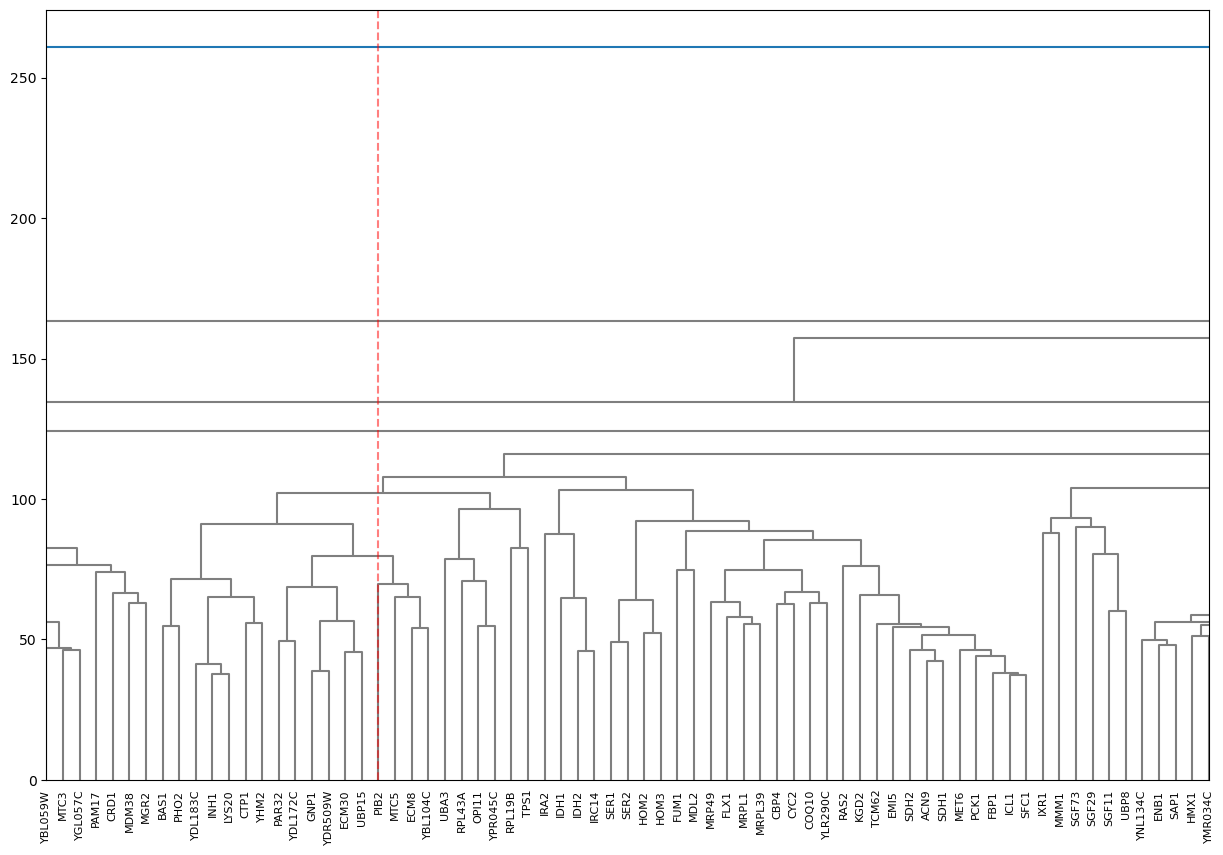

In [25]:
plt.figure(figsize=(15, 10))

# デンドログラムを作成し、leaf_labelsを保存
d = dendrogram(Z, 
               leaf_font_size=8,
               leaf_rotation=90,
               labels=pivot_df_2_filled.index)

# PIB2の位置を特定
leaf_labels = d['ivl']  # leaf_labelsを取得
pib2_idx = leaf_labels.index('PIB2')  # PIB2のインデックスを取得

# PIB2の位置に赤い縦線を引く
x = 5+10*pib2_idx
plt.axvline(x=x, color='red', linestyle='--', alpha=0.5)

plt.xlim(x-200, x+500)
# plt.ylim(0, 0.5)

## hierarchical clustering without standardization

In [26]:
pivot_df_2_filled = pivot_df_2.fillna(pivot_df_2.mean())
pivot_df_2_filled

Query gene,AAC1,AAD16,AAD3,AAP1,AAT2_damp,ABP1,ABZ1,ACF4,ACH1,ACN9,...,ufd1-2,ulp1-333,use1-ts,uso1-1,wbp1-1,wbp1-2,ycs4-1,yhc1-3,yhc1-8,yrb1-51
Array gene,,,,,,,,,,,,,,,,,,,,,
AAC1,-0.00364,-0.00276,0.009400,0.0096,0.007200,0.002500,0.032400,0.003200,-0.01530,0.007900,...,-0.028300,0.0079,0.0041,0.0017,0.0289,0.0203,-0.0617,-0.0062,0.0138,-0.0386
AAC3,-0.01870,-0.00276,0.019500,-0.0061,0.037500,0.014300,-0.008200,0.029300,-0.00635,0.072200,...,0.007300,-0.0306,0.0063,-0.0199,0.0186,-0.0520,-0.0081,-0.0873,-0.0477,-0.0279
AAD3,0.01520,-0.00276,-0.004442,-0.0207,-0.002300,-0.003713,-0.022300,-0.023600,-0.01710,0.033600,...,0.004900,-0.0161,-0.0153,0.0014,0.0101,0.0025,0.0197,-0.0431,-0.0080,-0.0080
AAD4,0.00250,-0.00530,-0.071900,-0.0036,0.050300,0.015300,-0.051200,-0.050400,-0.01080,-0.002335,...,-0.010300,0.0162,-0.0808,-0.0474,0.0042,0.0152,-0.0218,-0.0130,-0.0305,-0.0589
AAD6,-0.01470,-0.00276,-0.002000,0.0028,0.006900,0.011800,0.003900,-0.001900,0.04070,-0.002335,...,-0.040900,0.0171,0.0102,0.0087,0.0125,0.0153,0.0709,-0.0283,0.0195,-0.0226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRG17,-0.00690,-0.00276,-0.000400,-0.0048,0.054500,0.008600,-0.003811,0.021300,-0.00710,0.019900,...,0.049900,0.0290,0.0125,0.0034,0.0407,-0.0672,0.0161,-0.0446,-0.0166,-0.0278
ZRT1,0.04170,-0.05580,-0.017200,-0.0260,0.013300,-0.033700,0.021000,0.018200,0.03840,-0.015500,...,-0.003078,0.0519,-0.1018,0.0556,0.0138,-0.0422,-0.0227,0.0062,0.0206,-0.1042
ZRT2,-0.03220,-0.00276,-0.012600,0.0130,-0.002864,0.001100,-0.022200,-0.000500,0.01820,-0.002335,...,-0.039300,-0.0327,0.0138,0.0175,-0.0017,0.0192,-0.0594,-0.0024,-0.0165,-0.0026


In [32]:
Z_2 = linkage(pivot_df_2_filled, 'ward')
Z_2

array([[1.80400000e+03, 2.87300000e+03, 1.00930807e+00, 2.00000000e+00],
       [2.81300000e+03, 2.90400000e+03, 1.02029207e+00, 2.00000000e+00],
       [1.74000000e+02, 2.95200000e+03, 1.06693403e+00, 2.00000000e+00],
       ...,
       [7.76300000e+03, 7.76500000e+03, 1.02293031e+01, 8.60000000e+02],
       [7.50200000e+03, 7.76600000e+03, 1.04618428e+01, 8.70000000e+02],
       [7.76100000e+03, 7.76700000e+03, 1.11828840e+01, 3.88500000e+03]],
      shape=(3884, 4))

(36335.0, 37035.0)

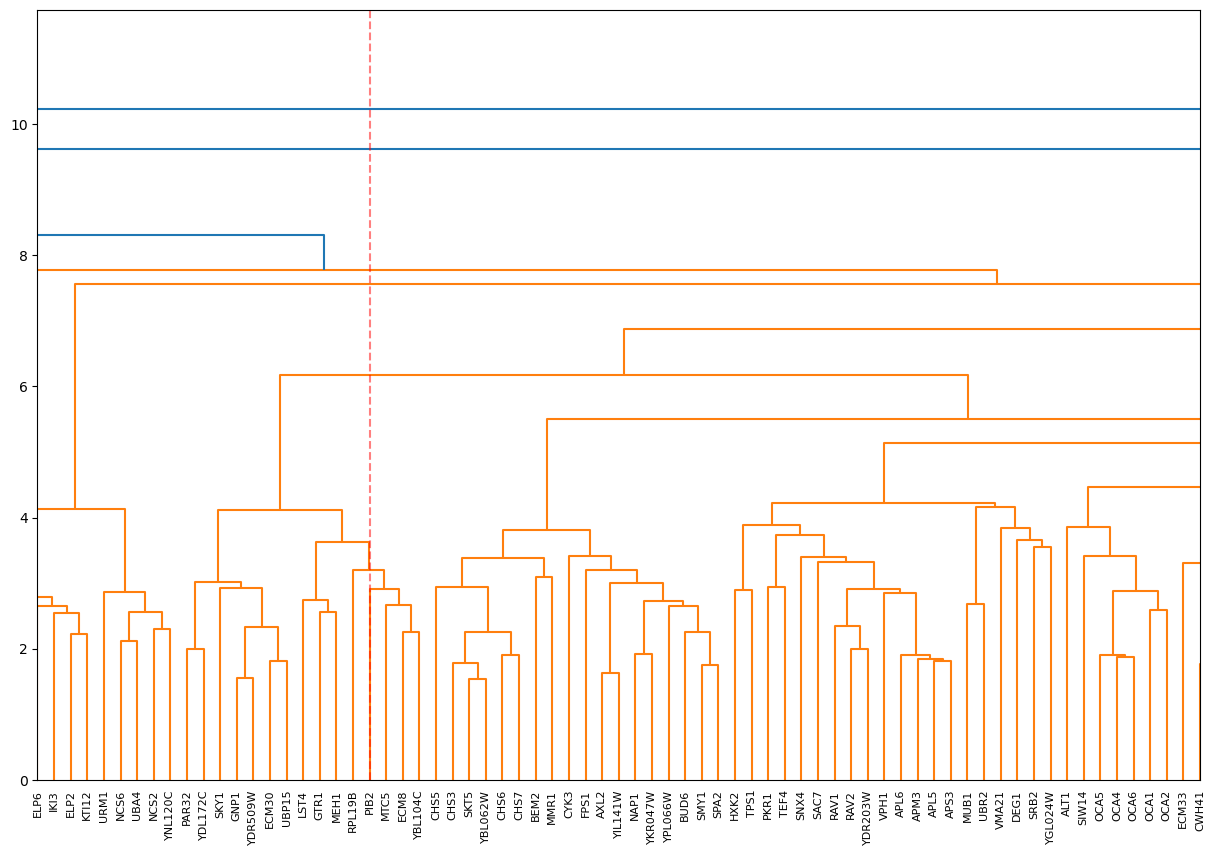

In [33]:
plt.figure(figsize=(15, 10))

# デンドログラムを作成し、leaf_labelsを保存
d = dendrogram(Z_2, 
               leaf_font_size=8,
               leaf_rotation=90,
               labels=pivot_df_2_filled.index)

# PIB2の位置を特定
leaf_labels = d['ivl']  # leaf_labelsを取得
pib2_idx = leaf_labels.index('PIB2')  # PIB2のインデックスを取得

# PIB2の位置に赤い縦線を引く
x = 5+10*pib2_idx
plt.axvline(x=x, color='red', linestyle='--', alpha=0.5)

plt.xlim(x-200, x+500)
# plt.ylim(0, 0.5)

In [7]:
pivot_df = df.pivot(index='Query gene', 
                    columns='Array gene', 
                    values='Genetic interaction score (ε)')

In [9]:
pivot_df

Array gene,AAC1,AAC3,AAD3,AAD4,AAD6,AAH1,AAP1,AAT1,ABM1,ABP1,...,ZDS2,ZEO1,ZIP1,ZIP2,ZRC1,ZRG17,ZRT1,ZRT2,ZRT3,ZTA1
Query gene,,,,,,,,,,,,,,,,,,,,,
AAC1,NaN,-0.0187,0.0152,0.0025,-0.0147,-0.0563,0.0133,-0.0237,0.0077,0.0201,...,NaN,-0.0285,0.0262,-0.0042,NaN,-0.0069,0.0417,-0.0322,0.0692,-0.0166
AAD16,NaN,NaN,NaN,-0.0053,NaN,NaN,-0.0429,NaN,NaN,-0.0119,...,NaN,NaN,-0.0309,0.0425,NaN,NaN,-0.0558,NaN,NaN,0.0170
AAD3,0.0094,0.0195,NaN,-0.0719,-0.0020,-0.1118,0.0453,-0.0028,-0.0290,NaN,...,0.0288,-0.0096,-0.0131,-0.0119,-0.0327,-0.0004,-0.0172,-0.0126,-0.0001,NaN
AAP1,0.0096,-0.0061,-0.0207,-0.0036,0.0028,-0.0053,NaN,0.0040,-0.0101,-0.0031,...,-0.0126,0.0131,0.0139,0.0205,-0.0153,-0.0048,-0.0260,0.0130,0.0603,0.0128
AAT2_damp,0.0072,0.0375,-0.0023,0.0503,0.0069,-0.0458,-0.0005,0.0102,0.0102,-0.0019,...,0.0348,0.0135,0.0002,0.0147,-0.0335,0.0545,0.0133,NaN,0.0035,-0.0180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbp1-2,0.0203,-0.0520,0.0025,0.0152,0.0153,0.0839,-0.0288,-0.0103,0.0127,-0.0814,...,0.0252,0.0528,-0.0109,0.0143,-0.0981,-0.0672,-0.0422,0.0192,0.0845,-0.0152
ycs4-1,-0.0617,-0.0081,0.0197,-0.0218,0.0709,0.0559,0.0272,0.0358,0.0177,-0.0435,...,-0.0182,-0.0002,-0.0250,-0.0485,0.0190,0.0161,-0.0227,-0.0594,0.0073,-0.0174
yhc1-3,-0.0062,-0.0873,-0.0431,-0.0130,-0.0283,-0.0035,-0.0180,0.0913,0.0244,0.1413,...,0.0034,-0.0707,-0.0302,-0.0251,0.1123,-0.0446,0.0062,-0.0024,-0.1002,0.1335


In [10]:
pivot_df.describe()

Array gene,AAC1,AAC3,AAD3,AAD4,AAD6,AAH1,AAP1,AAT1,ABM1,ABP1,...,ZDS2,ZEO1,ZIP1,ZIP2,ZRC1,ZRG17,ZRT1,ZRT2,ZRT3,ZTA1
count,1577.000000,1489.000000,1559.000000,1542.000000,1593.000000,1522.000000,1565.000000,1596.000000,1572.000000,1569.000000,...,1590.000000,1568.000000,1500.000000,1576.000000,1587.000000,1565.000000,1566.000000,1554.000000,1558.000000,1546.000000
mean,0.001021,-0.001735,-0.004551,-0.004758,-0.001391,-0.020123,-0.007867,-0.000226,0.000371,0.001047,...,-0.002141,-0.006578,0.000114,-0.002310,-0.005485,-0.004942,-0.009888,-0.002578,-0.003364,-0.004776
std,0.024033,0.028456,0.023073,0.040114,0.025776,0.063920,0.035042,0.033963,0.025119,0.034078,...,0.034411,0.037302,0.032004,0.027962,0.051968,0.032085,0.067195,0.025898,0.035457,0.033604
min,-0.101100,-0.340200,-0.282000,-0.514200,-0.140300,-0.325800,-0.186200,-0.252500,-0.103700,-0.384100,...,-0.979500,-0.322800,-0.323700,-0.188800,-0.605200,-0.394600,-0.475500,-0.139800,-0.177900,-0.285200
25%,-0.014000,-0.017400,-0.016400,-0.021975,-0.016100,-0.055500,-0.028100,-0.017300,-0.014300,-0.012800,...,-0.015200,-0.026000,-0.016200,-0.017725,-0.031500,-0.021700,-0.035775,-0.017700,-0.023700,-0.020000
50%,0.000200,-0.002200,-0.004200,-0.002800,-0.002100,-0.015000,-0.007000,-0.001800,-0.000900,0.001100,...,-0.001650,-0.006750,-0.000200,-0.002750,-0.003400,-0.004800,-0.004200,-0.003350,-0.002300,-0.002200
75%,0.014700,0.015100,0.007900,0.018475,0.013000,0.017800,0.014000,0.018350,0.015200,0.017900,...,0.013000,0.014000,0.016725,0.013625,0.025850,0.012800,0.025925,0.012975,0.018100,0.014575
max,0.107600,0.109300,0.112500,0.159600,0.120100,0.310300,0.177300,0.177600,0.192100,0.215800,...,0.087500,0.196800,0.132000,0.105500,0.226700,0.180300,0.247900,0.104300,0.233200,0.133500


In [11]:
pivot_df['PIB2']

Query gene
AAC1        -0.0139
AAD16       -0.0063
AAD3        -0.0132
AAP1        -0.0276
AAT2_damp    0.0117
              ...  
wbp1-2      -0.0414
ycs4-1      -0.0084
yhc1-3      -0.0419
yhc1-8      -0.0222
yrb1-51     -0.0755
Name: PIB2, Length: 1711, dtype: float64

In [14]:
pivot_df.iloc[0:5]

Array gene,AAC1,AAC3,AAD3,AAD4,AAD6,AAH1,AAP1,AAT1,ABM1,ABP1,...,ZDS2,ZEO1,ZIP1,ZIP2,ZRC1,ZRG17,ZRT1,ZRT2,ZRT3,ZTA1
Query gene,,,,,,,,,,,,,,,,,,,,,
AAC1,NaN,-0.0187,0.0152,0.0025,-0.0147,-0.0563,0.0133,-0.0237,0.0077,0.0201,...,NaN,-0.0285,0.0262,-0.0042,NaN,-0.0069,0.0417,-0.0322,0.0692,-0.0166
AAD16,NaN,NaN,NaN,-0.0053,NaN,NaN,-0.0429,NaN,NaN,-0.0119,...,NaN,NaN,-0.0309,0.0425,NaN,NaN,-0.0558,NaN,NaN,0.0170
AAD3,0.0094,0.0195,NaN,-0.0719,-0.0020,-0.1118,0.0453,-0.0028,-0.0290,NaN,...,0.0288,-0.0096,-0.0131,-0.0119,-0.0327,-0.0004,-0.0172,-0.0126,-0.0001,NaN
AAP1,0.0096,-0.0061,-0.0207,-0.0036,0.0028,-0.0053,NaN,0.0040,-0.0101,-0.0031,...,-0.0126,0.0131,0.0139,0.0205,-0.0153,-0.0048,-0.0260,0.0130,0.0603,0.0128
AAT2_damp,0.0072,0.0375,-0.0023,0.0503,0.0069,-0.0458,-0.0005,0.0102,0.0102,-0.0019,...,0.0348,0.0135,0.0002,0.0147,-0.0335,0.0545,0.0133,NaN,0.0035,-0.0180


In [16]:
plot_df

Array gene,Query gene,AAC1,AAC3,AAD3,AAD4,AAD6,AAH1,AAP1,AAT1,ABM1,...,ZDS2,ZEO1,ZIP1,ZIP2,ZRC1,ZRG17,ZRT1,ZRT2,ZRT3,ZTA1
0,AAC1,NaN,-0.0187,0.0152,0.0025,-0.0147,-0.0563,0.0133,-0.0237,0.0077,...,NaN,-0.0285,0.0262,-0.0042,NaN,-0.0069,0.0417,-0.0322,0.0692,-0.0166
1,AAD16,NaN,NaN,NaN,-0.0053,NaN,NaN,-0.0429,NaN,NaN,...,NaN,NaN,-0.0309,0.0425,NaN,NaN,-0.0558,NaN,NaN,0.0170
2,AAD3,0.0094,0.0195,NaN,-0.0719,-0.0020,-0.1118,0.0453,-0.0028,-0.0290,...,0.0288,-0.0096,-0.0131,-0.0119,-0.0327,-0.0004,-0.0172,-0.0126,-0.0001,NaN
3,AAP1,0.0096,-0.0061,-0.0207,-0.0036,0.0028,-0.0053,NaN,0.0040,-0.0101,...,-0.0126,0.0131,0.0139,0.0205,-0.0153,-0.0048,-0.0260,0.0130,0.0603,0.0128
4,AAT2_damp,0.0072,0.0375,-0.0023,0.0503,0.0069,-0.0458,-0.0005,0.0102,0.0102,...,0.0348,0.0135,0.0002,0.0147,-0.0335,0.0545,0.0133,NaN,0.0035,-0.0180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1706,wbp1-2,0.0203,-0.0520,0.0025,0.0152,0.0153,0.0839,-0.0288,-0.0103,0.0127,...,0.0252,0.0528,-0.0109,0.0143,-0.0981,-0.0672,-0.0422,0.0192,0.0845,-0.0152
1707,ycs4-1,-0.0617,-0.0081,0.0197,-0.0218,0.0709,0.0559,0.0272,0.0358,0.0177,...,-0.0182,-0.0002,-0.0250,-0.0485,0.0190,0.0161,-0.0227,-0.0594,0.0073,-0.0174
1708,yhc1-3,-0.0062,-0.0873,-0.0431,-0.0130,-0.0283,-0.0035,-0.0180,0.0913,0.0244,...,0.0034,-0.0707,-0.0302,-0.0251,0.1123,-0.0446,0.0062,-0.0024,-0.1002,0.1335
1709,yhc1-8,0.0138,-0.0477,-0.0080,-0.0305,0.0195,0.0039,-0.0021,-0.0177,-0.0301,...,-0.0138,-0.0641,0.0524,-0.0235,0.0772,-0.0166,0.0206,-0.0165,-0.0449,0.0054


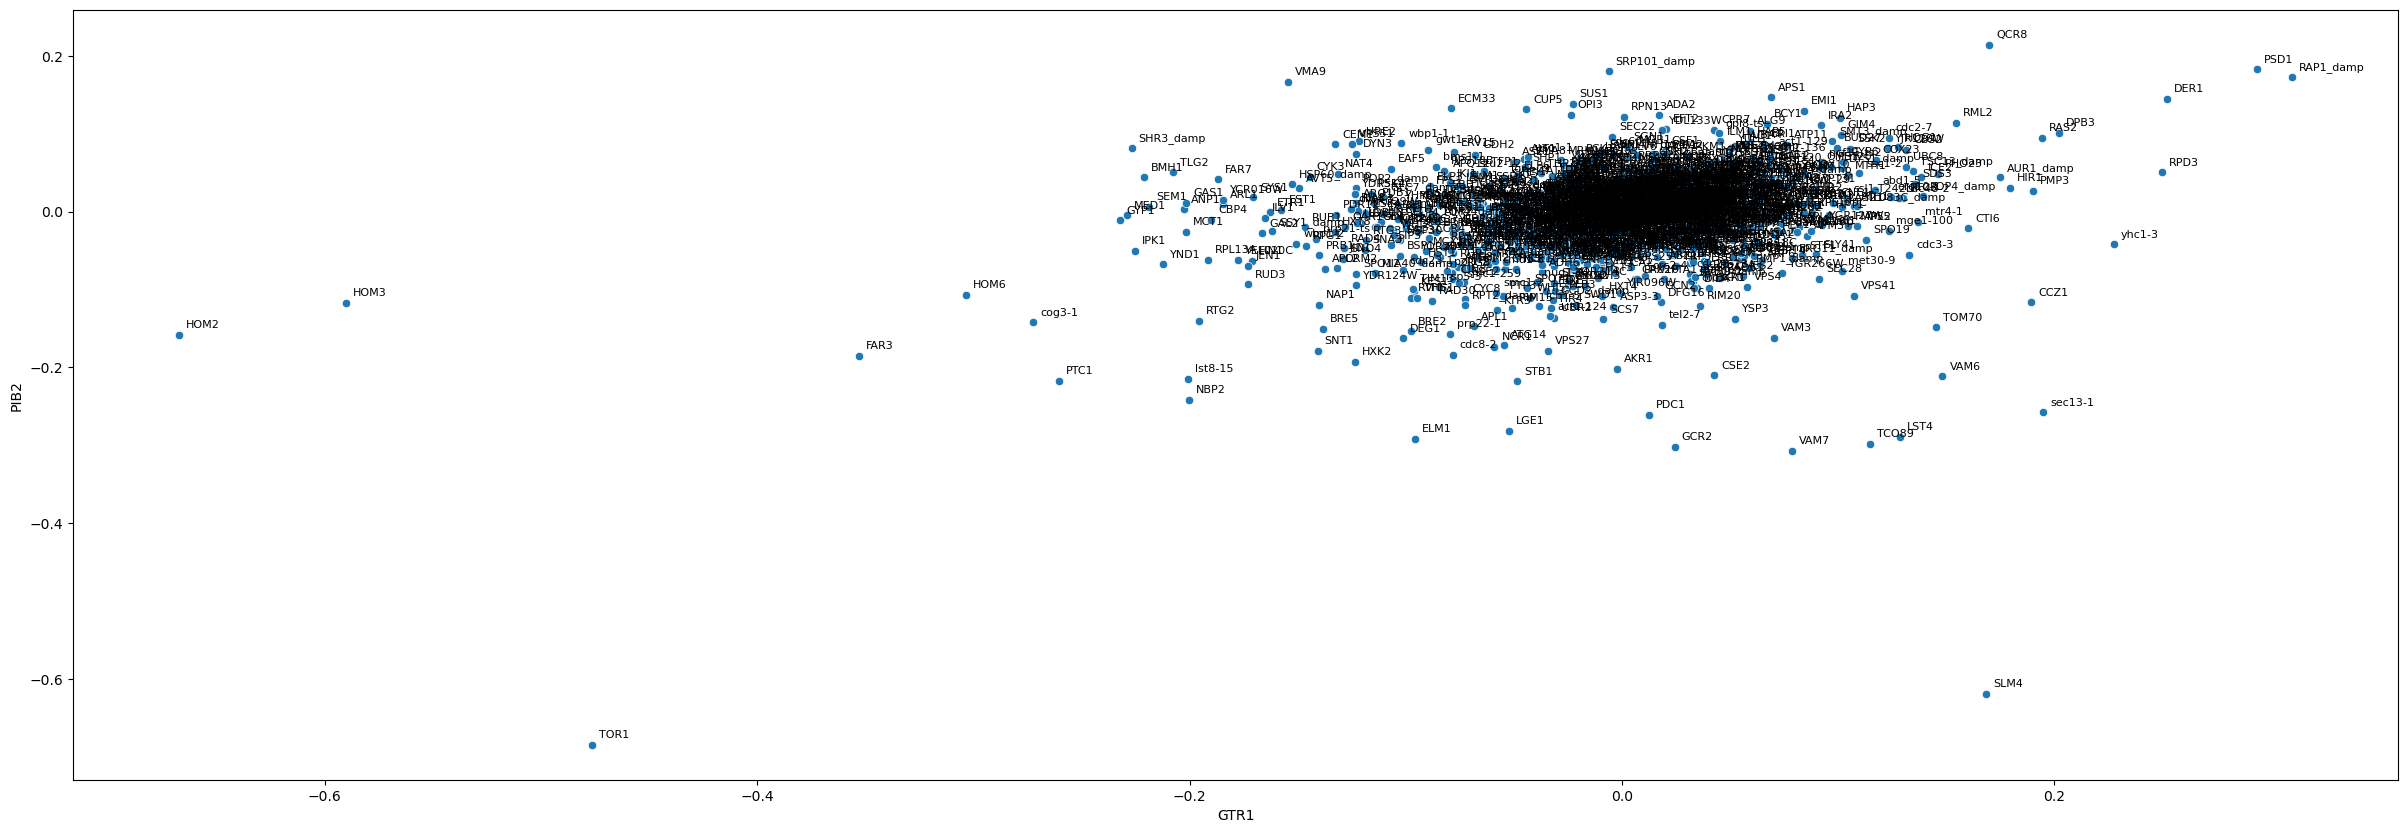

In [15]:
plot_df = pivot_df.reset_index()

fig, ax = plt.subplots(figsize=(30, 10))
sns.scatterplot(x='GTR1', y='PIB2', data=pivot_df)

for idx, row in plot_df.iterrows():
    plt.annotate(row['Query gene'], 
                (row['GTR1'], row['PIB2']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)


In [19]:
pivot_df_corr = pivot_df.corr()

In [20]:
pivot_df_corr

Array gene,AAC1,AAC3,AAD3,AAD4,AAD6,AAH1,AAP1,AAT1,ABM1,ABP1,...,ZDS2,ZEO1,ZIP1,ZIP2,ZRC1,ZRG17,ZRT1,ZRT2,ZRT3,ZTA1
Array gene,,,,,,,,,,,,,,,,,,,,,
AAC1,1.000000,0.012389,-0.017152,-0.019192,0.033696,-0.024690,0.031476,0.087822,0.019567,-0.017936,...,0.020998,0.069833,-0.008851,0.069234,-0.028616,-0.069799,0.069687,0.030672,0.048336,0.023904
AAC3,0.012389,1.000000,0.061970,-0.055449,0.032183,-0.037414,0.065032,-0.030664,0.026236,0.005220,...,0.034609,0.094613,-0.051782,0.035014,0.007176,0.045186,0.027304,0.104285,-0.014067,-0.106465
AAD3,-0.017152,0.061970,1.000000,0.008933,0.005789,0.070153,0.067483,-0.022051,0.041720,0.056713,...,-0.015561,-0.029819,0.010610,-0.027435,0.016223,0.007706,0.037551,0.002455,0.054187,-0.049765
AAD4,-0.019192,-0.055449,0.008933,1.000000,0.018500,-0.000022,0.014560,-0.028825,0.105957,0.081228,...,0.005121,-0.062818,0.036140,-0.020049,-0.092010,0.143993,0.044594,-0.058674,-0.036247,0.039932
AAD6,0.033696,0.032183,0.005789,0.018500,1.000000,0.007253,0.010041,0.038478,0.094087,0.009384,...,0.031787,0.107400,0.035103,-0.018516,0.037122,0.013089,0.092929,0.012964,0.030028,-0.055207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZRG17,-0.069799,0.045186,0.007706,0.143993,0.013089,-0.023634,0.022687,0.005361,0.048504,0.029570,...,-0.012022,-0.052113,0.062039,-0.005769,-0.041888,1.000000,0.079171,-0.016682,0.022938,-0.030547
ZRT1,0.069687,0.027304,0.037551,0.044594,0.092929,0.051819,0.033992,0.021234,0.038887,0.071571,...,0.018467,-0.030248,0.025006,0.038450,-0.011664,0.079171,1.000000,0.022327,0.035733,-0.033711
ZRT2,0.030672,0.104285,0.002455,-0.058674,0.012964,0.024432,0.085681,0.019041,-0.019049,-0.004445,...,-0.007196,0.067282,0.003125,-0.030440,-0.039873,-0.016682,0.022327,1.000000,-0.053040,-0.057256


In [23]:
pivot_df_corr.loc['ATG22'].sort_values(ascending=False)[:20]

Array gene
ATG22      1.000000
SNZ1       0.193329
PUS5       0.189867
RPS9A      0.188026
DSS4       0.180341
FMP43      0.178701
YDR134C    0.174511
PML39      0.165918
YLL058W    0.163265
URA10      0.158890
GPH1       0.158774
RAV2       0.156541
ALT2       0.154659
SAP4       0.151474
MEP1       0.148485
TAH1       0.143269
SLM3       0.143258
MGT1       0.140473
IRS4       0.139709
YCL074W    0.139540
Name: ATG22, dtype: float64

In [24]:
pivot_df_corr.loc['PIB2'].sort_values(ascending=False)[:20]

Array gene
PIB2       1.000000
ECM8       0.389067
MEH1       0.339511
GTR1       0.262327
LST4       0.253695
YOL050C    0.209265
YBL104C    0.175839
RFX1       0.174453
SNZ1       0.173282
YDR266C    0.173033
SER2       0.172027
MUB1       0.170251
RTS1       0.165967
YLR402W    0.164295
RPA34      0.164015
HOM3       0.161260
CLB6       0.158146
YPR045C    0.157804
HOM2       0.152689
VAC17      0.151837
Name: PIB2, dtype: float64

In [25]:
pivot_df_corr.loc['GTR1'].sort_values(ascending=False)[:20]

Array gene
GTR1       1.000000
MEH1       0.606675
LST4       0.502515
ECM8       0.420395
YDR509W    0.355479
YBL104C    0.344189
MTC5       0.320289
GNP1       0.291982
UBP15      0.288512
ECM30      0.277991
PAR32      0.272350
PIB2       0.262327
YDL172C    0.257515
SNX4       0.207703
GYP1       0.206918
DFG5       0.191970
YCL062W    0.180141
STP2       0.169553
SMI1       0.168002
ADH1       0.165101
Name: GTR1, dtype: float64